In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/STT450-STT550/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 100 #Default display 100 dpi in Jupyter Notebook
plt.rcParams['savefig.dpi'] = 300 #define 300 dpi for saving figures
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
import seaborn as sns
from IPython.display import set_matplotlib_formats

## here are some additional settings
sns.set_style("ticks") # sns.set_style('whitegrid')
sns.set_context('notebook') # Set context for notebook
set_matplotlib_formats('retina') # For Colab, handles display quality automatically
sns.set(rc={'savefig.dpi': 300}) # Only set savefig DPI

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/STT450-STT550


/tmp/ipython-input-1561382913.py:18: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina') # For Colab, handles display quality automatically


In [ ]:
## Read in the 'marketing campaign' dataset in Jupyter Notebook;
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')
#df.columns = df.iloc[0]
print(df.head())
print(df.columns)
df.shape


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

(2240, 29)

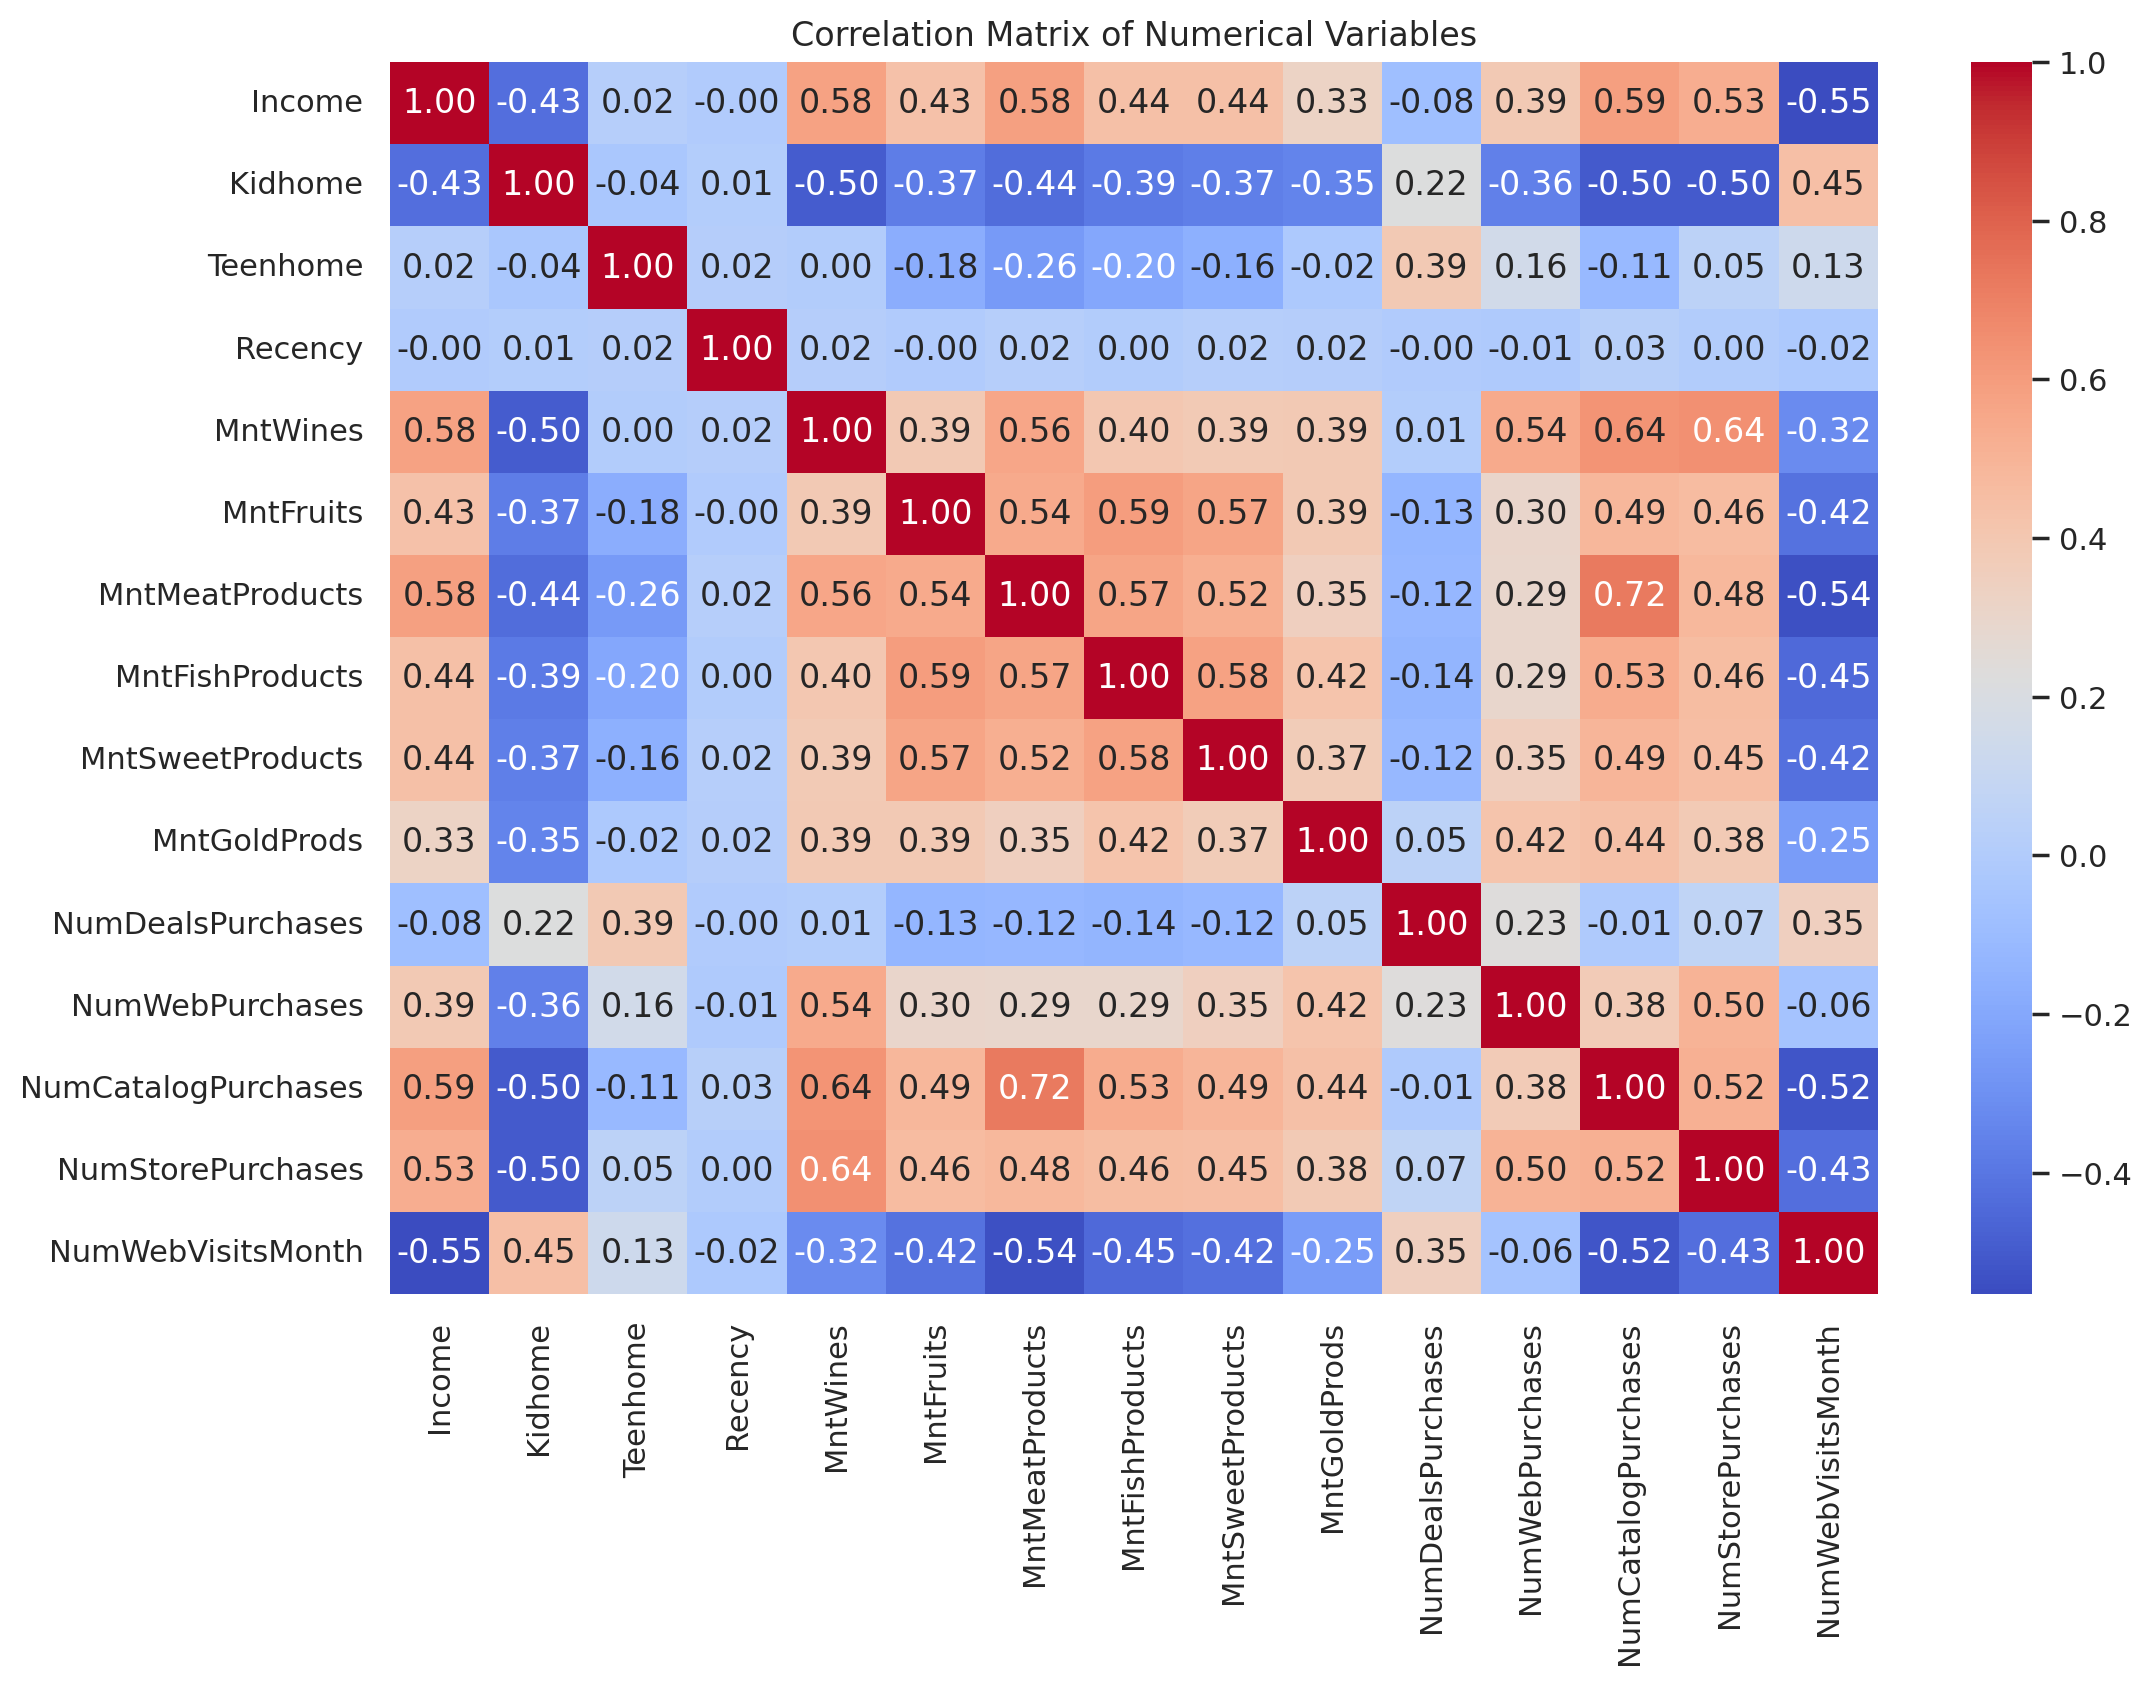

In [ ]:
num_cols = df.loc[:,['Income','Kidhome','Teenhome','Recency','MntWines',
              'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
              'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]
plt.figure(figsize=(12, 8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [ ]:
display(num_cols.describe())

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


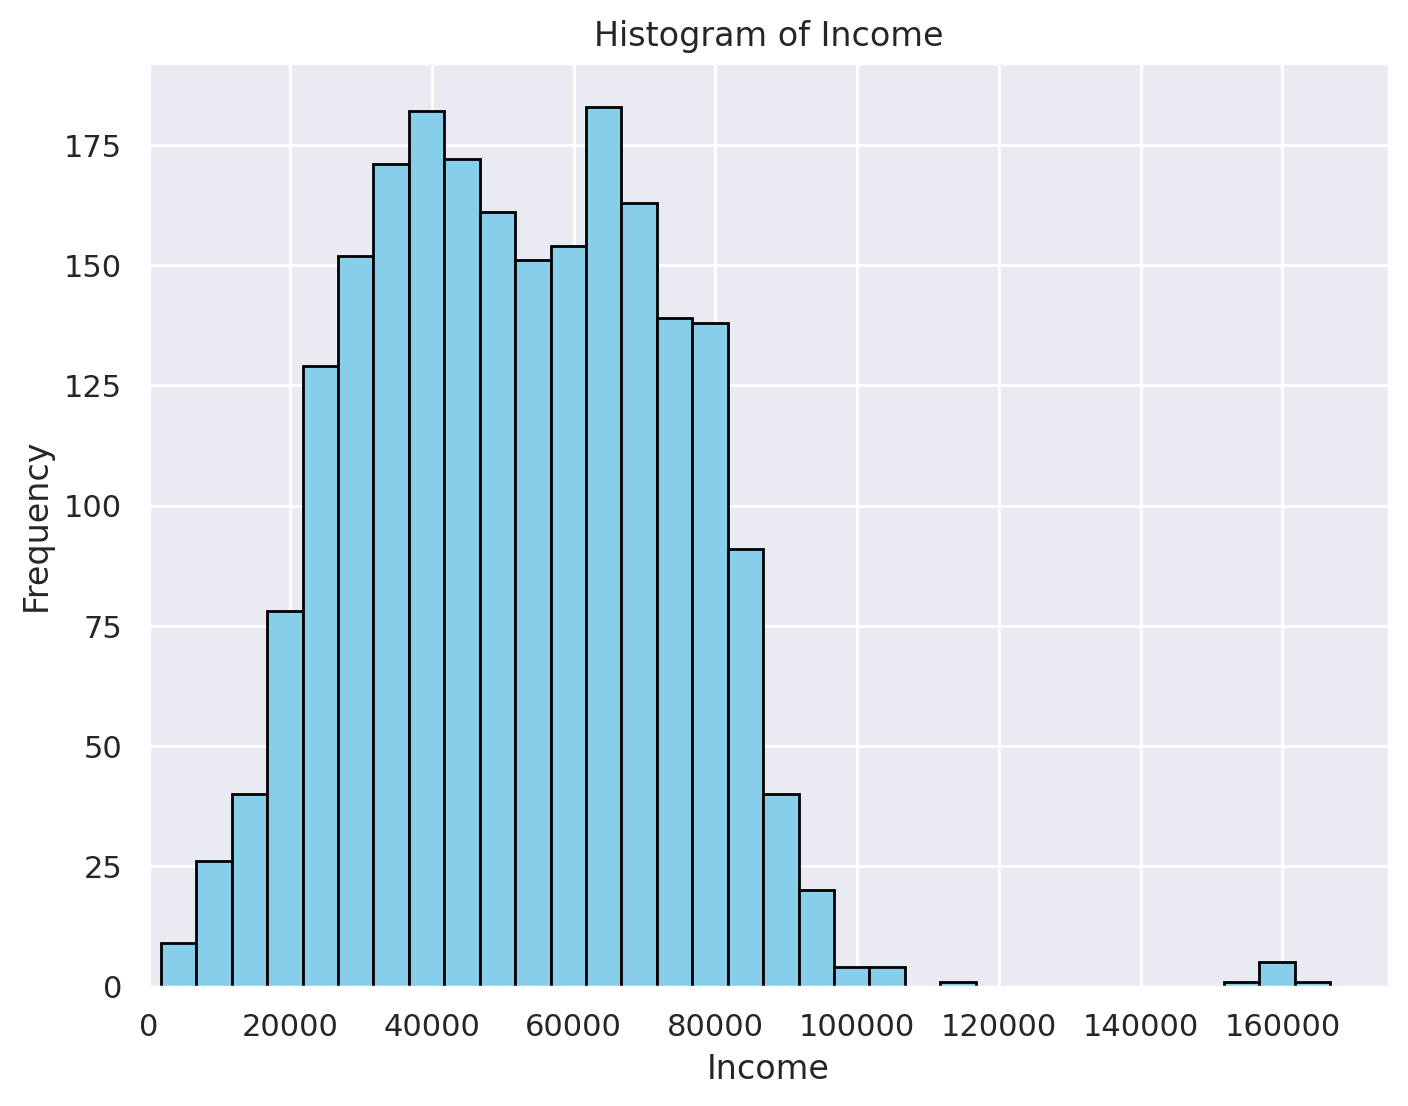

In [ ]:
income_col = df['Income']
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
min_val = np.min(income_col)
max_val = np.max(income_col)
binwidth = 5000 # Define binwidth
bins = np.arange(min_val, max_val + binwidth, binwidth)
plt.hist(income_col, bins= bins, color='skyblue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.xlim(0, 175000)
plt.savefig('income_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

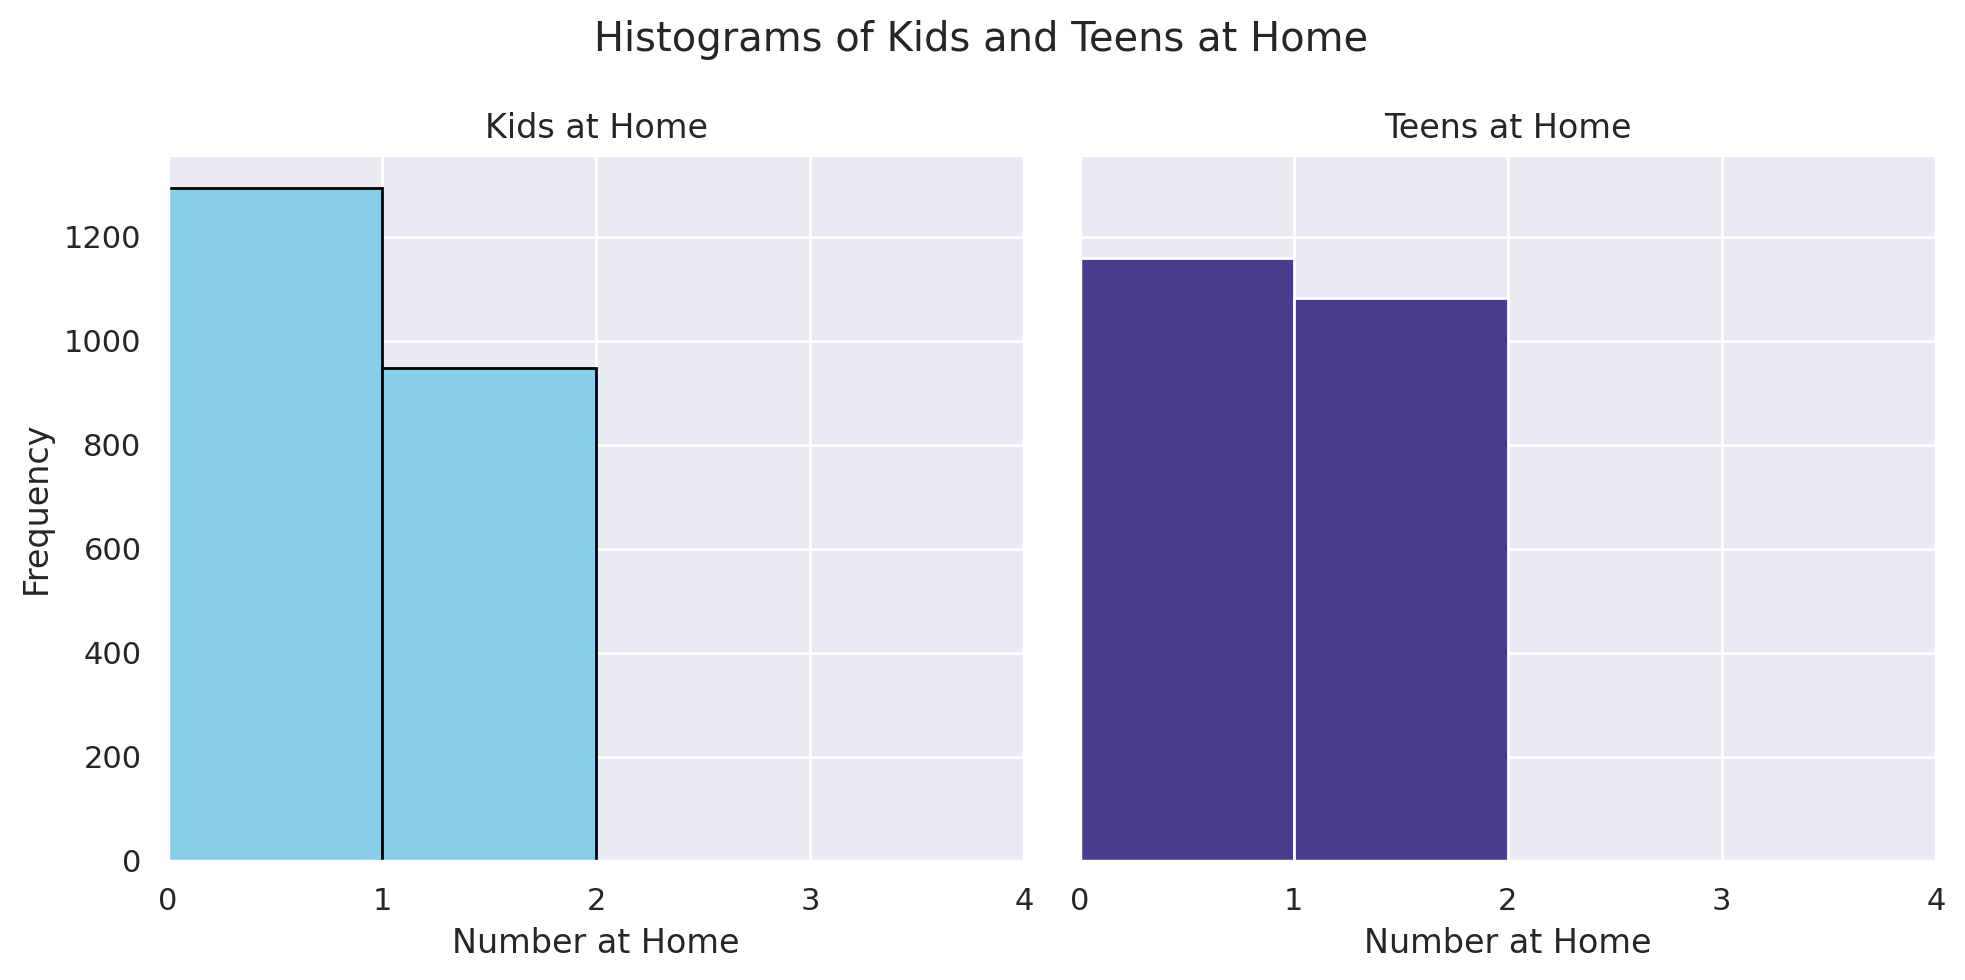

In [ ]:
kidhome = df['Kidhome']
teenhome = df['Teenhome']

min_val = min(kidhome.min(), teenhome.min())
max_val = max(kidhome.max(), teenhome.max())
binwidth = 1
bins = np.arange(min_val, max_val + binwidth, binwidth)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axs[0].hist(kidhome, bins=bins, color='skyblue', edgecolor='black')
axs[0].set_title('Kids at Home')
axs[0].set_xlabel('Number at Home')
axs[0].set_ylabel('Frequency')
axs[0].set_xlim(0, 4)
axs[0].xaxis.set_ticks(np.arange(0, 5, 1))

axs[1].hist(teenhome, bins=bins, color='darkslateblue', edgecolor='white')
axs[1].set_title('Teens at Home')
axs[1].set_xlabel('Number at Home')
axs[1].set_xlim(0, 4)
axs[1].xaxis.set_ticks(np.arange(0, 5, 1))
fig.suptitle('Histograms of Kids and Teens at Home')

plt.savefig('kidhome_teenhome_histogram.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


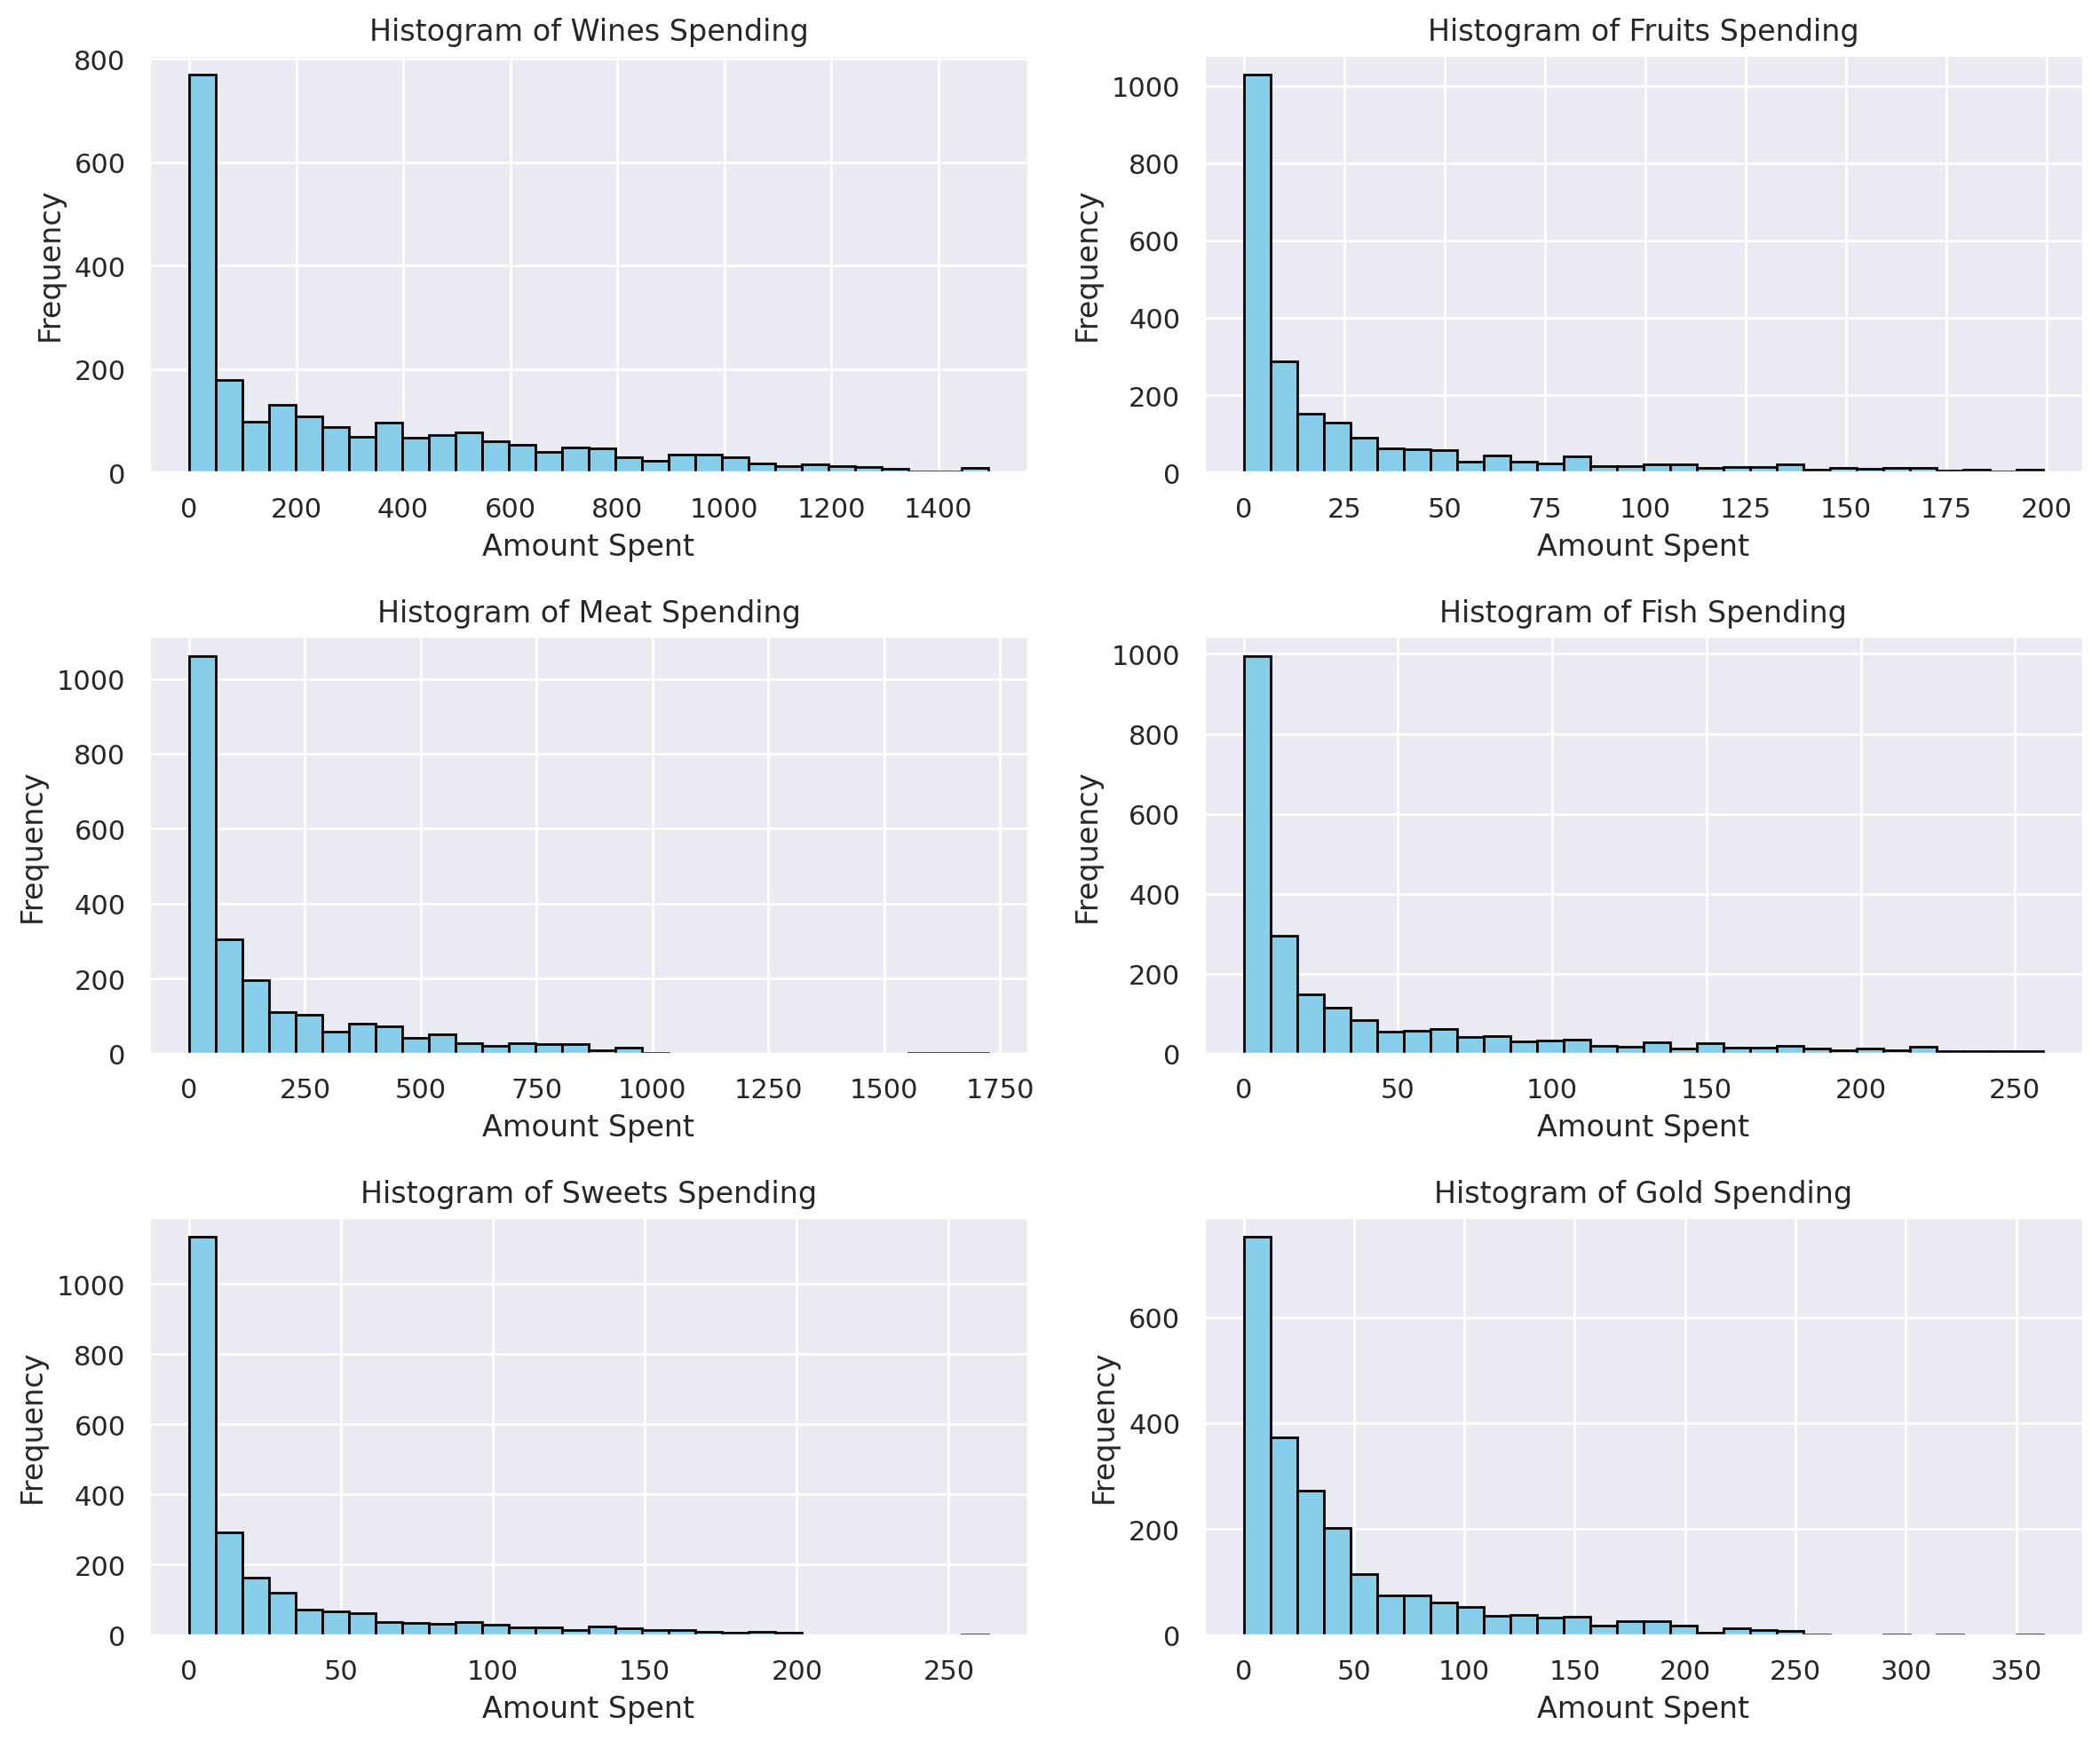

In [ ]:
mntwines = df['MntWines']
mntfruits = df['MntFruits']
mntmeat = df['MntMeatProducts']
mntfish = df['MntFishProducts']
mntsweets = df['MntSweetProducts']
mntgold = df['MntGoldProds']
data_dict = {
    'Wines': mntwines,
    'Fruits': mntfruits,
    'Meat': mntmeat,
    'Fish': mntfish,
    'Sweets': mntsweets,
    'Gold': mntgold
}
fig, axes = plt.subplots(3, 2, figsize=(12, 10), sharex=False, sharey=False)

for ax, (label, data) in zip(axes.flatten(), data_dict.items()):
    ax.hist(data, bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {label} Spending')
    ax.set_xlabel('Amount Spent')
    ax.set_ylabel('Frequency')

plt.savefig('histograms.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2054752493.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


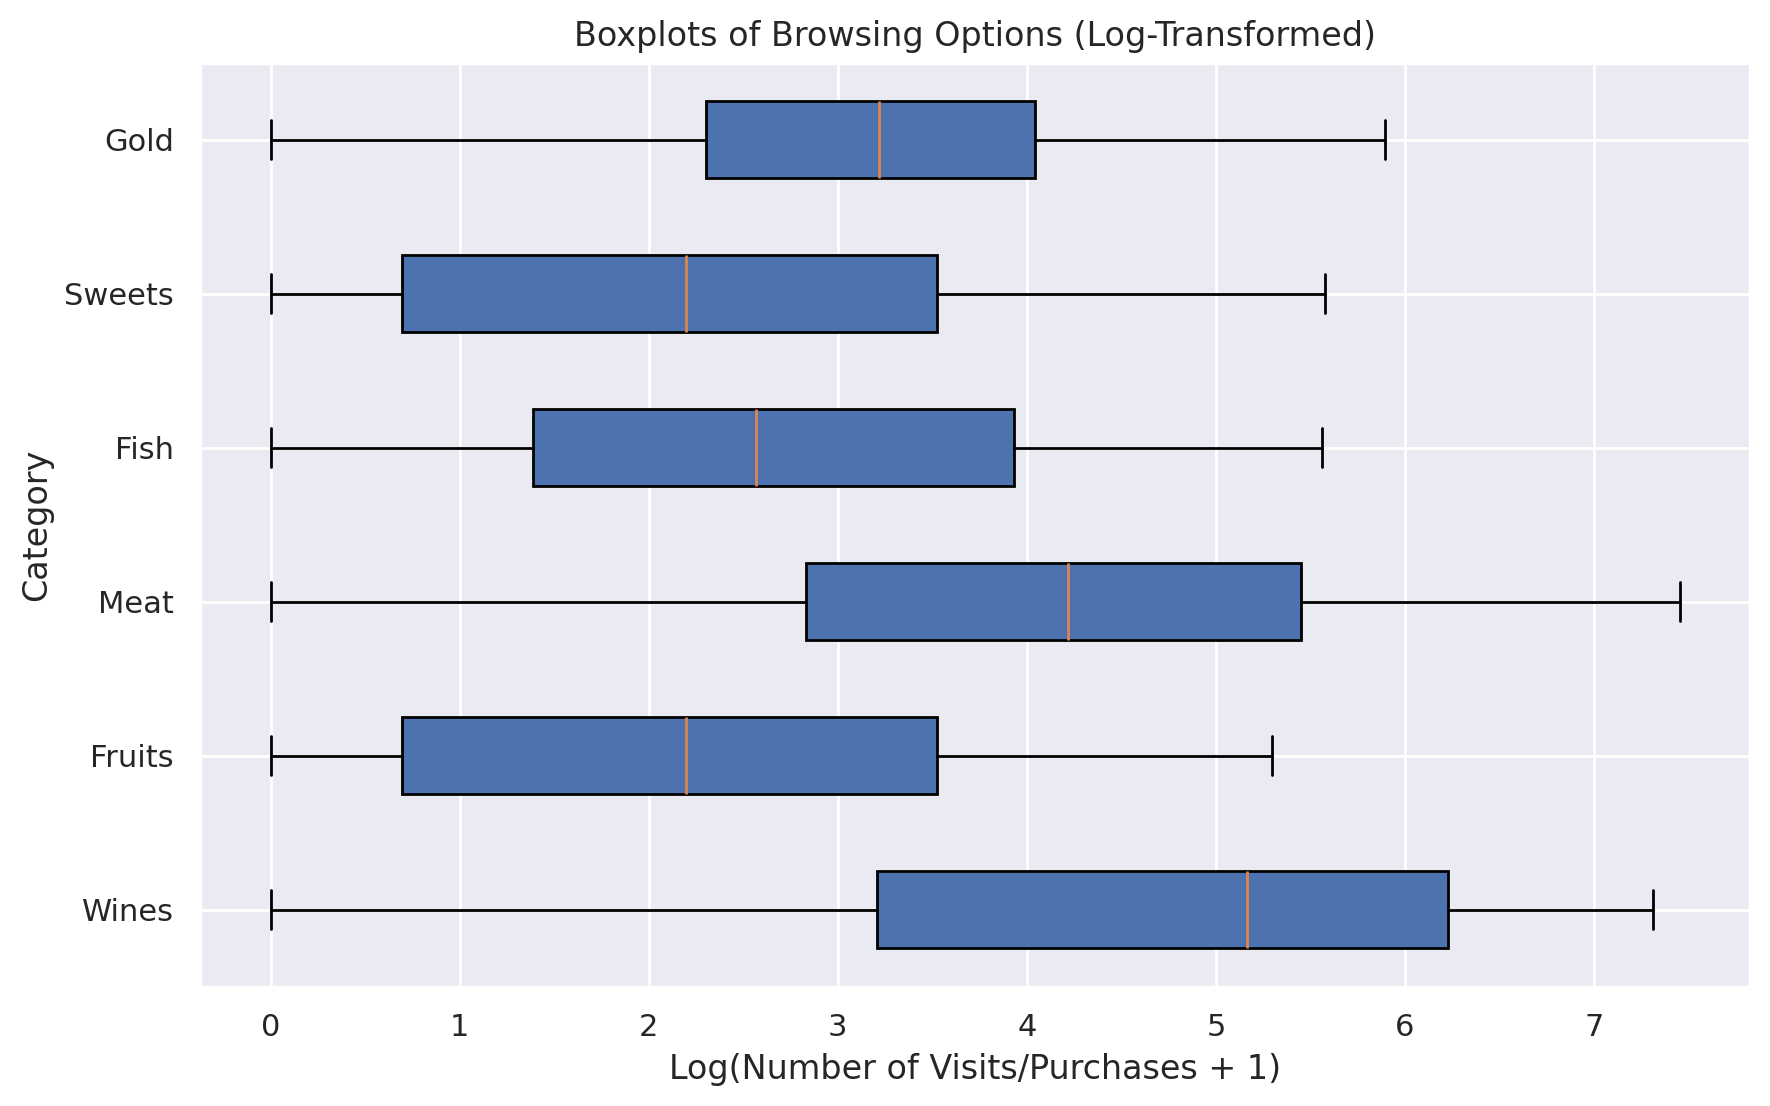

In [ ]:
import numpy as np
log_data_dict_browsing = {k: np.log1p(v) for k, v in data_dict.items()}

plt.figure(figsize=(10, 6))
plt.boxplot(
    log_data_dict_browsing.values(),
    labels=log_data_dict_browsing.keys(),
    patch_artist=True,
    vert=False
)
plt.title('Boxplots of Browsing Options (Log-Transformed)')
plt.xlabel('Log(Number of Visits/Purchases + 1)')
plt.ylabel('Category')
plt.xticks(rotation=0)  # Rotate labels back to horizontal for better readability
plt.show()

/tmp/ipython-input-3414650040.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


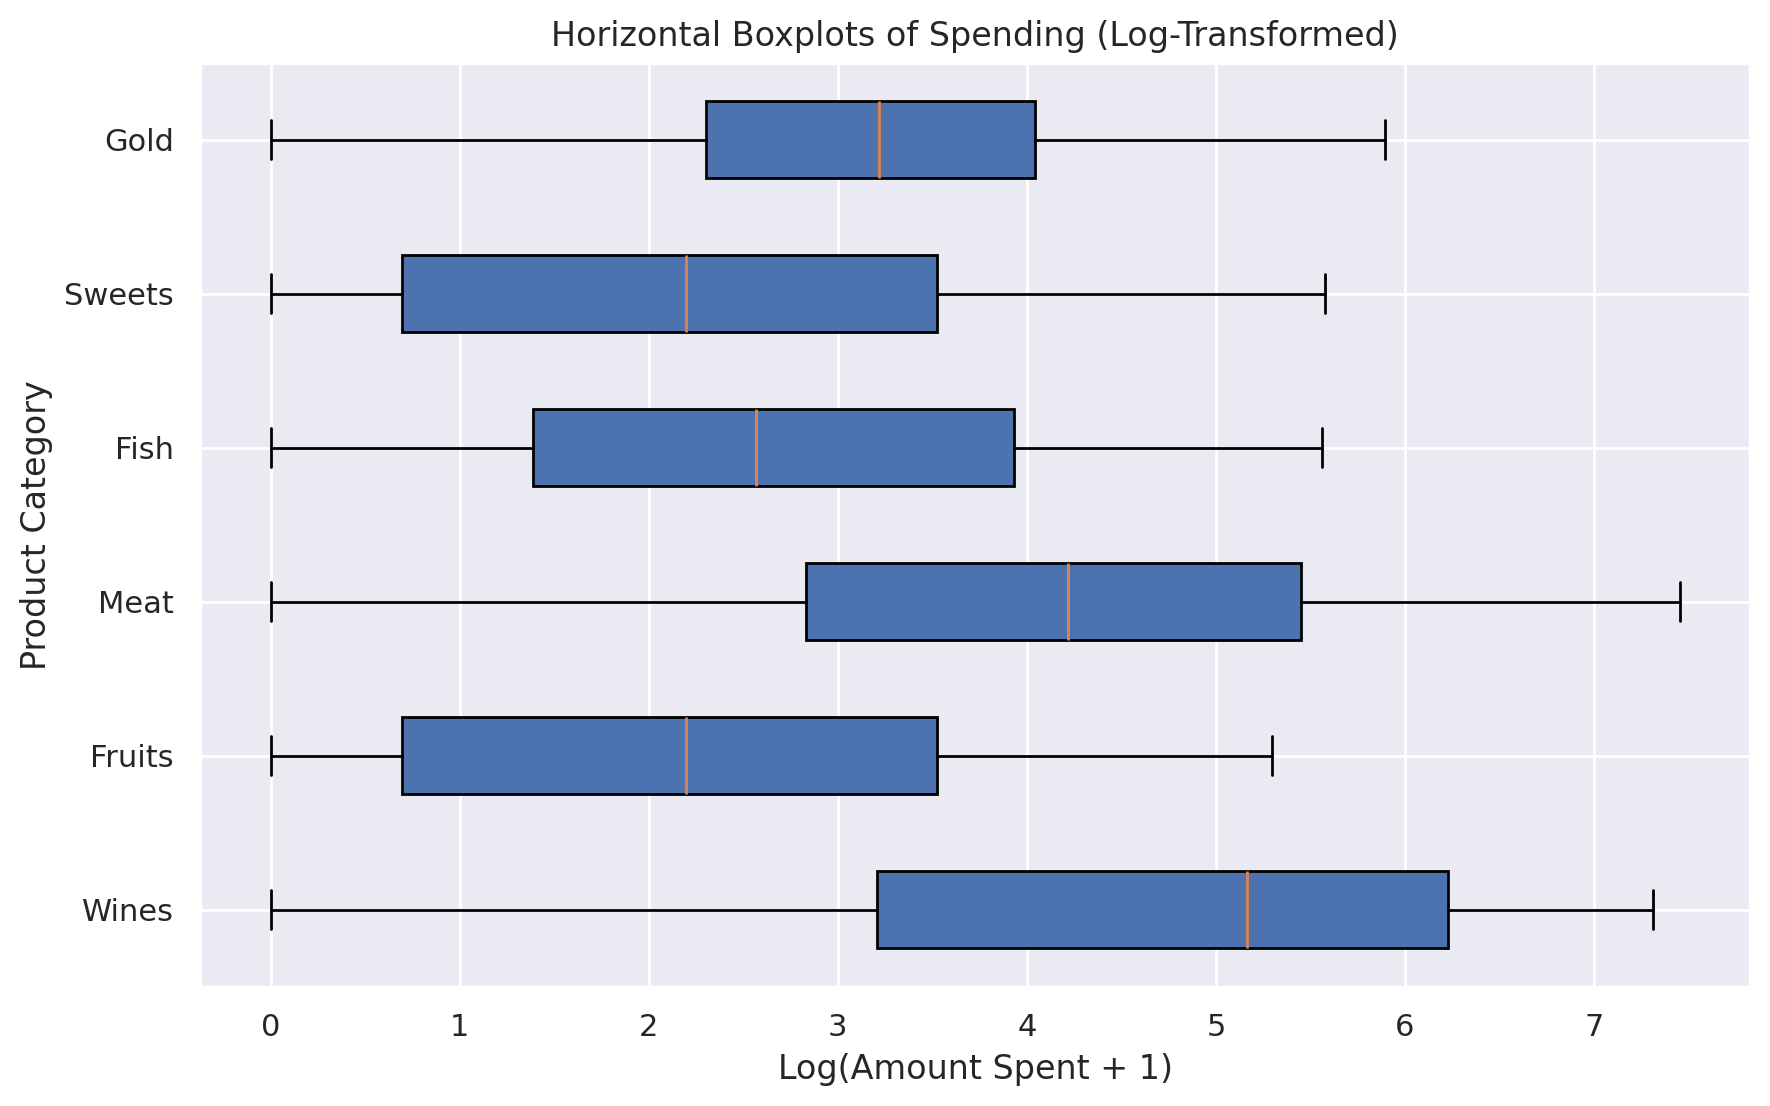

In [ ]:
import numpy as np
log_data_dict = {k: np.log1p(v) for k, v in data_dict.items()}

plt.figure(figsize=(10, 6))
plt.boxplot(
    log_data_dict.values(),
    labels=log_data_dict.keys(),
    patch_artist=True,
    vert=False
)
plt.title('Horizontal Boxplots of Spending (Log-Transformed)')
plt.xlabel('Log(Amount Spent + 1)')
plt.ylabel('Product Category')
plt.savefig('log_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()


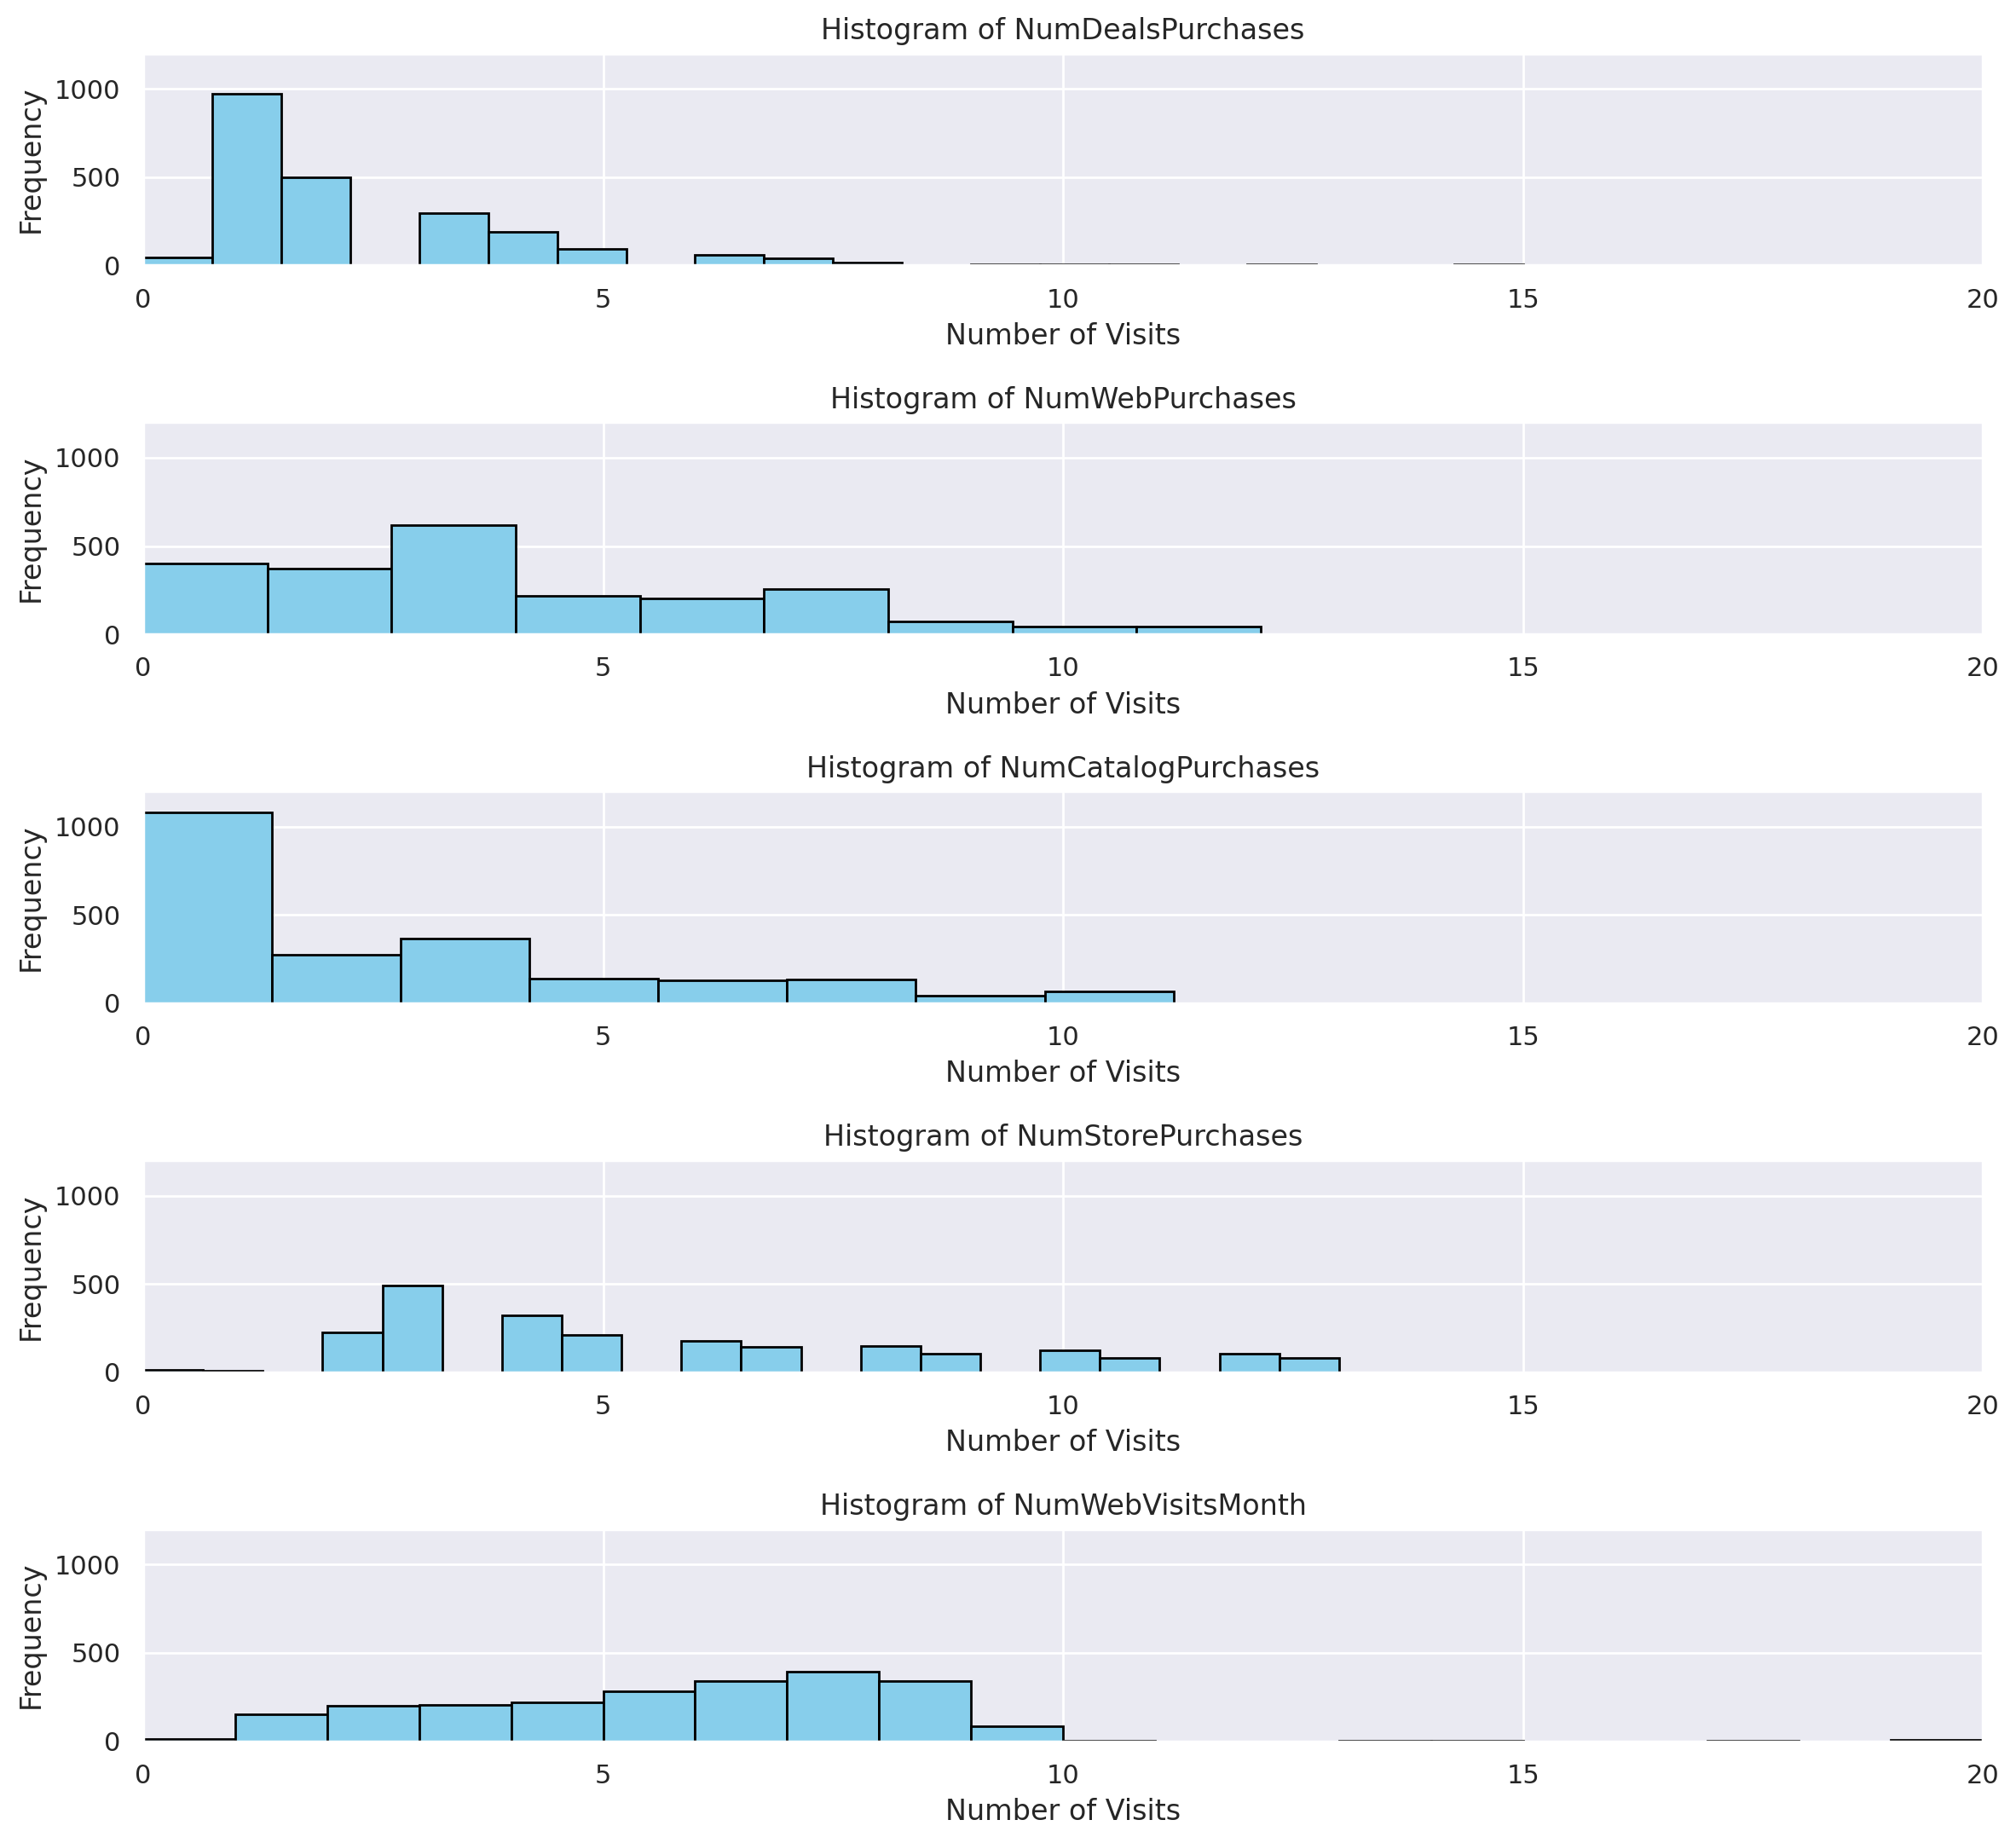

In [ ]:
numdealspurchases = df['NumDealsPurchases']
numwebpurchases = df['NumWebPurchases']
numcatalogpurchases = df['NumCatalogPurchases']
numstorepurchases = df['NumStorePurchases']
numwebvisitsmonth = df['NumWebVisitsMonth']
data_dict = {
    'NumDealsPurchases': numdealspurchases,
    'NumWebPurchases': numwebpurchases,
    'NumCatalogPurchases': numcatalogpurchases,
    'NumStorePurchases': numstorepurchases,
    'NumWebVisitsMonth': numwebvisitsmonth
}
fig, axes = plt.subplots(5,1, figsize=(12, 11), sharex=False, sharey=False)

for ax, (label, data) in zip(axes.flatten(), data_dict.items()):
    ax.hist(data, bins=20, color='skyblue', edgecolor='black')
    ax.set_ylim(0,1200)
    ax.set_xlim(0,20)
    ax.set_xticks(np.arange(0,21,5))
    ax.set_title(f'Histogram of {label}')
    ax.set_xlabel('Number of Visits')
    ax.set_ylabel('Frequency')

plt.savefig('histograms.png', dpi=300)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1459164552.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_dict.values(), labels=data_dict.keys(), patch_artist=True, vert = False)


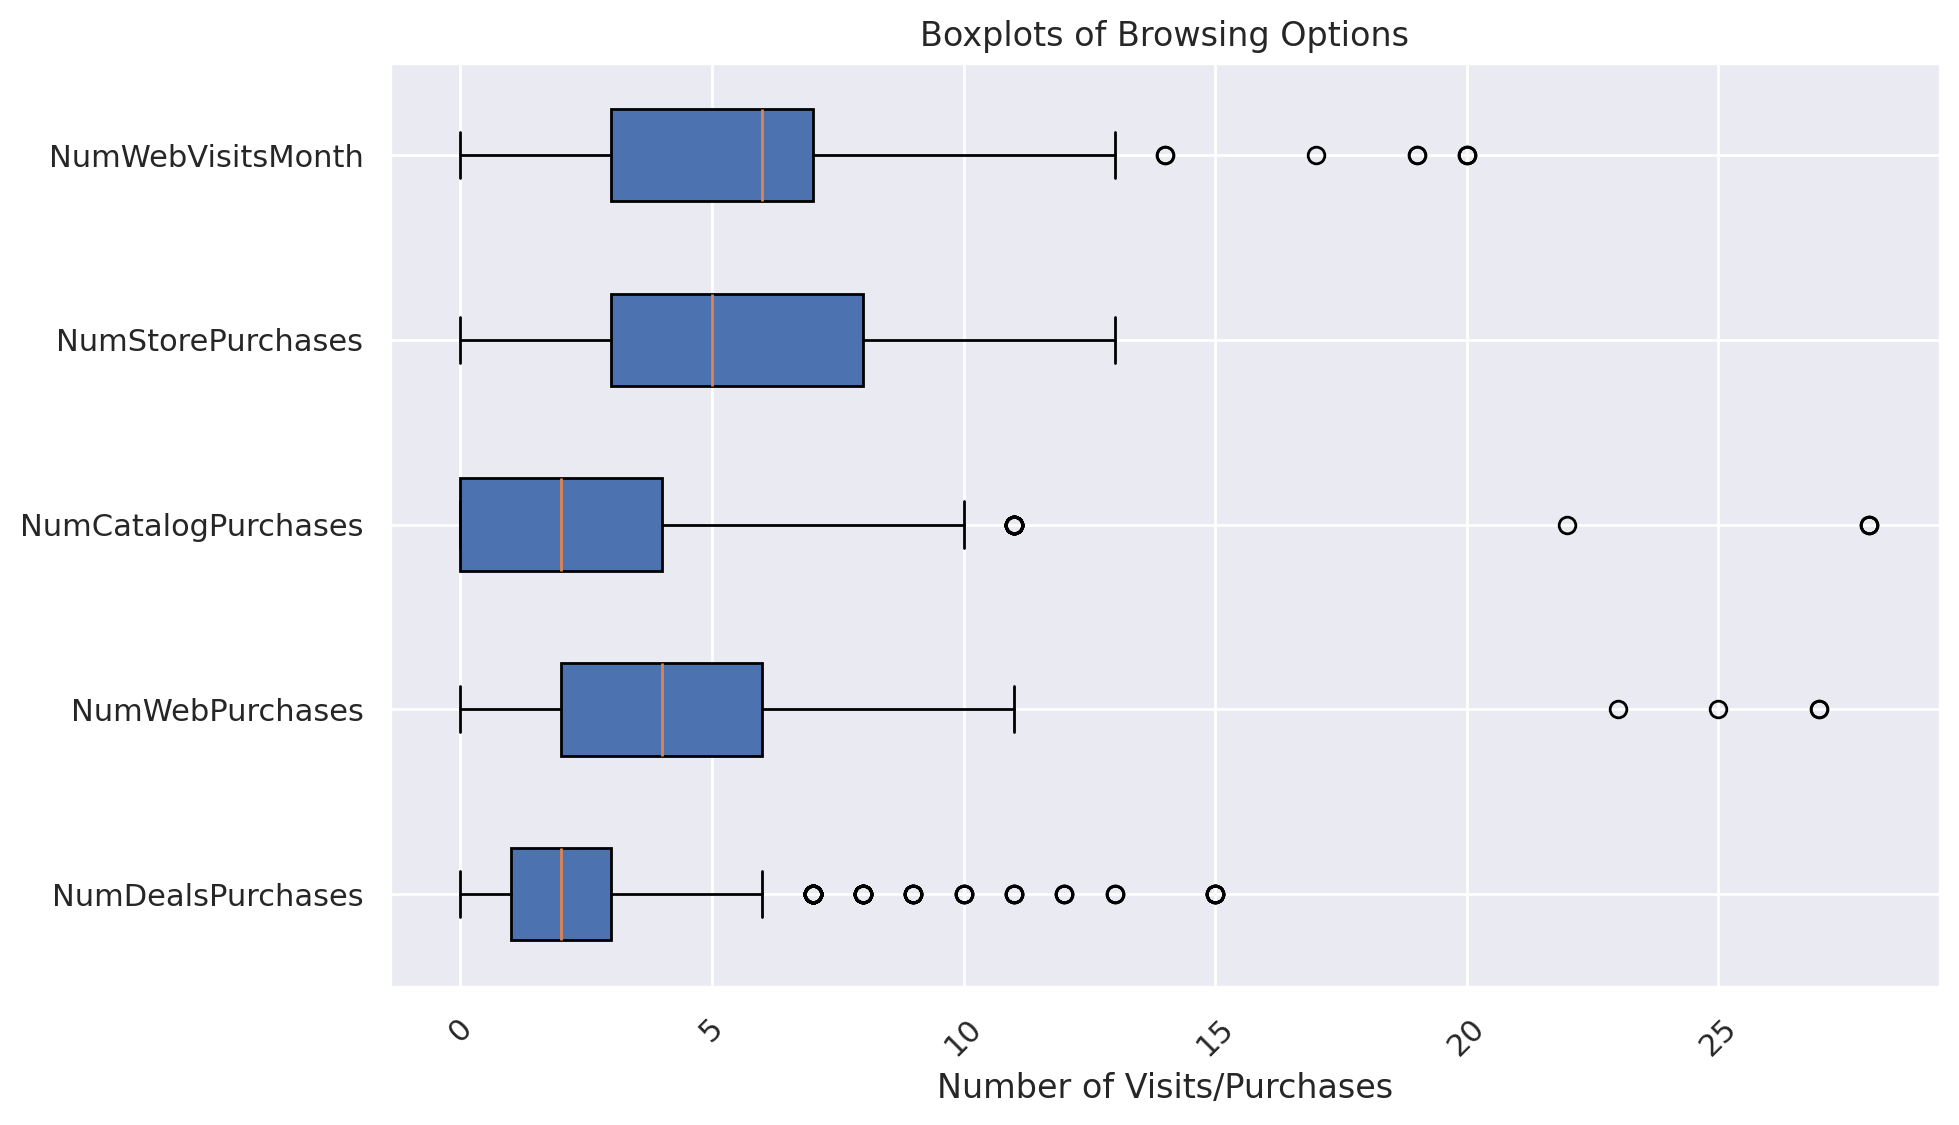

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(data_dict.values(), labels=data_dict.keys(), patch_artist=True, vert = False)

plt.title('Boxplots of Browsing Options')
plt.xlabel('Number of Visits/Purchases')
plt.xticks(rotation=45)
plt.show()


          Count  Proportion
Complain                   
No         2219    0.990625
Yes          21    0.009375


/tmp/ipython-input-1992627518.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proportions.index, y=proportions.values, palette="pastel")


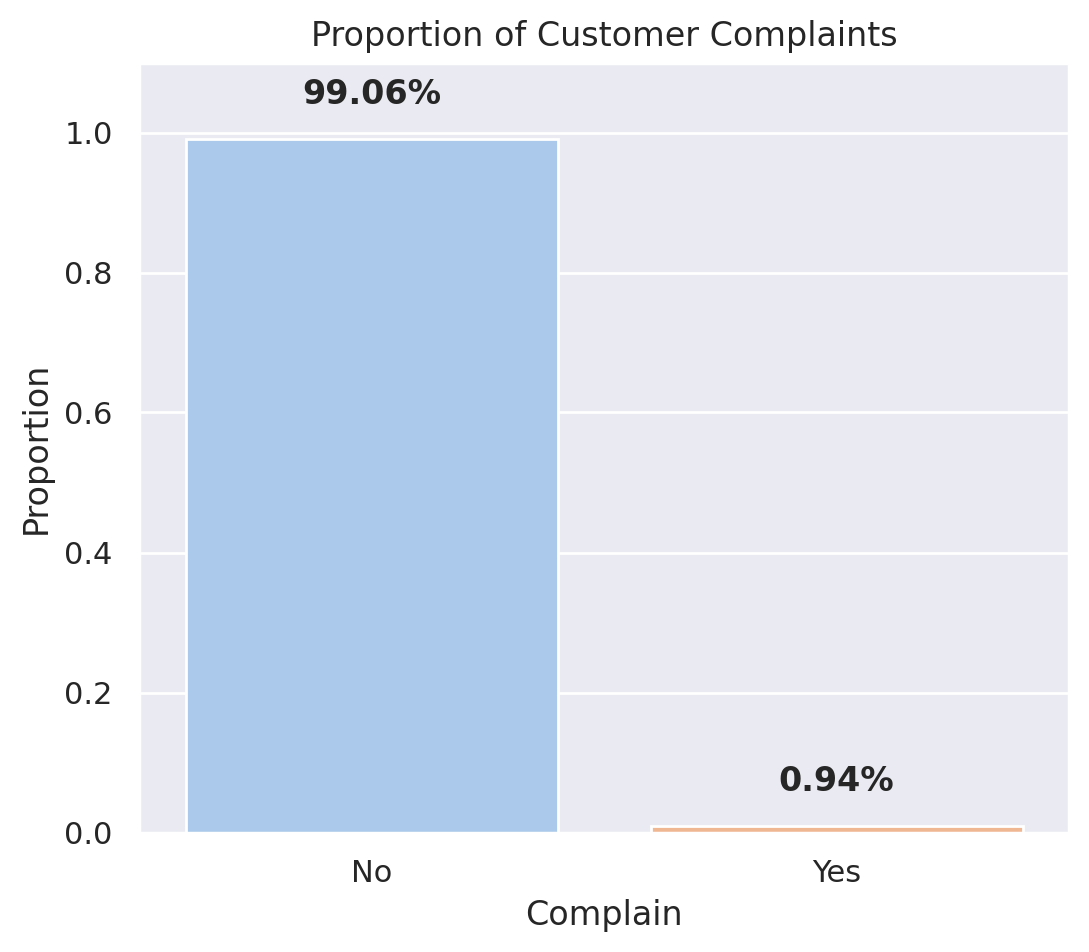

<Figure size 640x480 with 0 Axes>

In [ ]:
df['Complain'] = df['Complain'].replace({0: "No", 1: "Yes"})
counts = df['Complain'].value_counts()
proportions = df['Complain'].value_counts(normalize=True)
complain_summary = pd.DataFrame({
    'Count': counts,
    'Proportion': proportions
})

print(complain_summary)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.barplot(x=proportions.index, y=proportions.values, palette="pastel")

plt.title("Proportion of Customer Complaints")
plt.ylabel("Proportion")
plt.xlabel("Complain")
plt.ylim(0,1.1) # Increased the y-axis limit

for i, v in enumerate(proportions.values):
    plt.text(i, v + 0.05, f"{v:.2%}", ha='center', fontweight='bold') # Adjusted vertical position

plt.show()
plt.savefig('complain_proportion.png', dpi=300, bbox_inches='tight')

            Count  Proportion
Education                    
Graduation   1127    0.503125
Master        573    0.255804
PhD           486    0.216964
Basic          54    0.024107


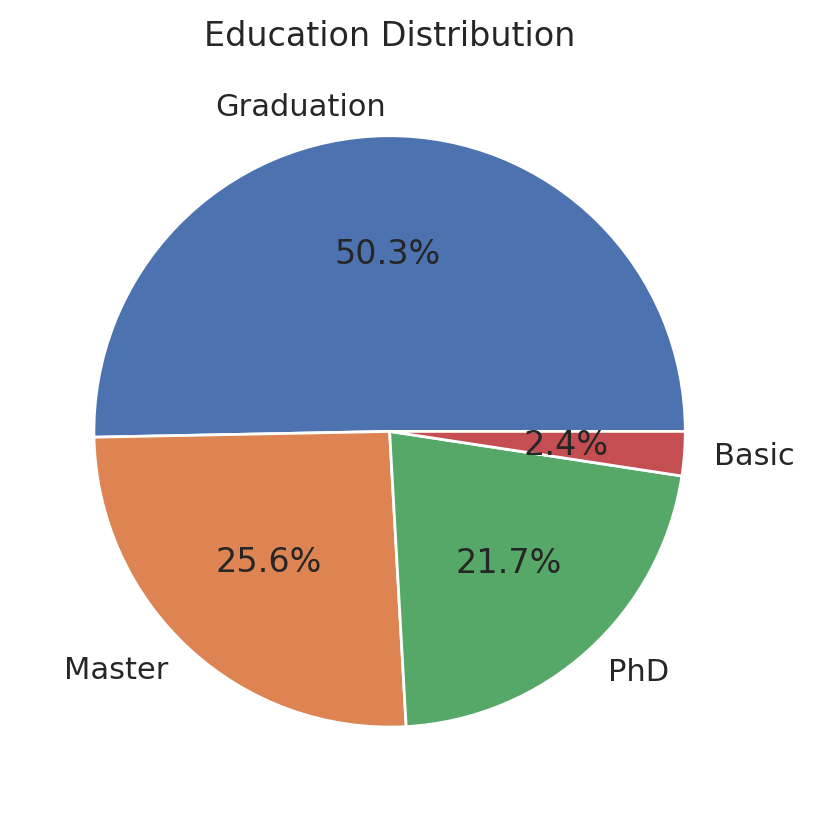

<Figure size 640x480 with 0 Axes>

In [ ]:
df['Education'] = df['Education'].replace({'2n Cycle': 'Master', '2n Cycle': 'Master'})
counts = df['Education'].value_counts()
proportions = df['Education'].value_counts(normalize=True)
edu_summary = pd.DataFrame({
    'Count': counts,
    'Proportion': proportions
})

print(edu_summary)
plt.pie(edu_summary['Proportion'], labels=edu_summary.index, autopct='%1.1f%%')
plt.title('Education Distribution')
plt.show()
plt.savefig('edu_proportion.png', dpi=300, bbox_inches='tight')

                Count  Proportion
Marital_Status                   
Married           864    0.386404
Together          580    0.259392
Single            483    0.216011
Divorced          232    0.103757
Widow              77    0.034436


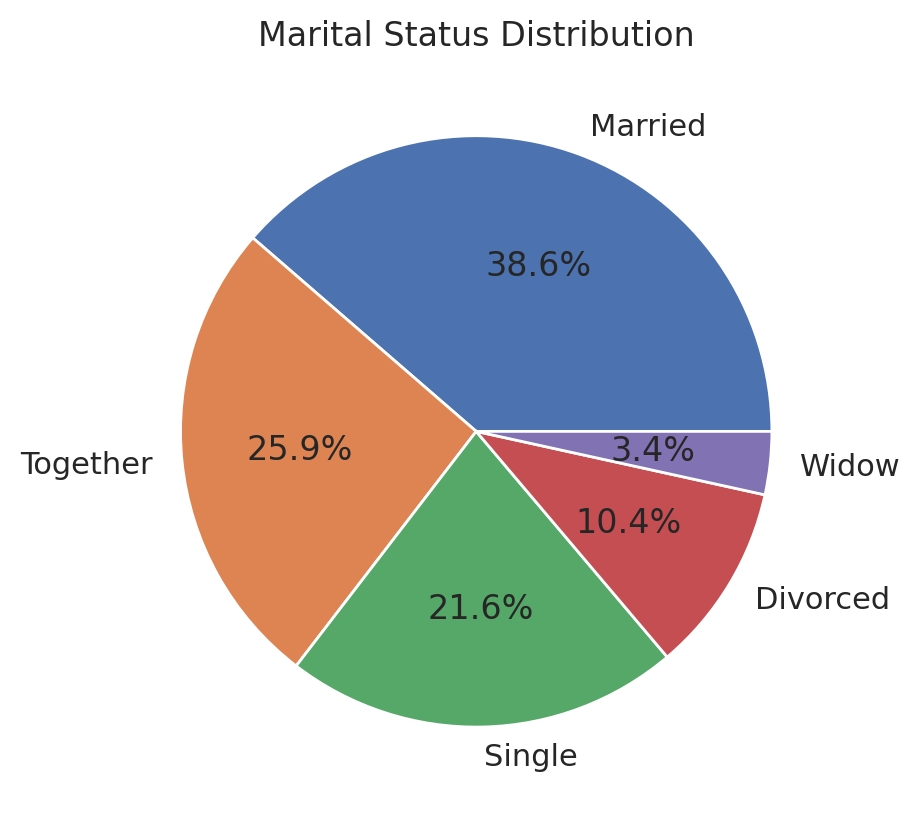

<Figure size 640x480 with 0 Axes>

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    'Absurd': np.nan,
    'YOLO': np.nan
})

counts = df['Marital_Status'].value_counts()
proportions = df['Marital_Status'].value_counts(normalize=True)
marry_summary = pd.DataFrame({
    'Count': counts,
    'Proportion': proportions
})

print(marry_summary)
plt.pie(marry_summary['Proportion'], labels=marry_summary.index, autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.show()
plt.savefig('marry_proportion.png', dpi=300, bbox_inches='tight')

             Count  Proportion
Season_Year                   
2012-Fall      291    0.129911
2012-Summer    120    0.053571
2012-Winter     83    0.037054
2013-Fall      301    0.134375
2013-Spring    294    0.131250
2013-Summer    295    0.131696
2013-Winter    299    0.133482
2014-Spring    315    0.140625
2014-Summer     74    0.033036
2014-Winter    168    0.075000


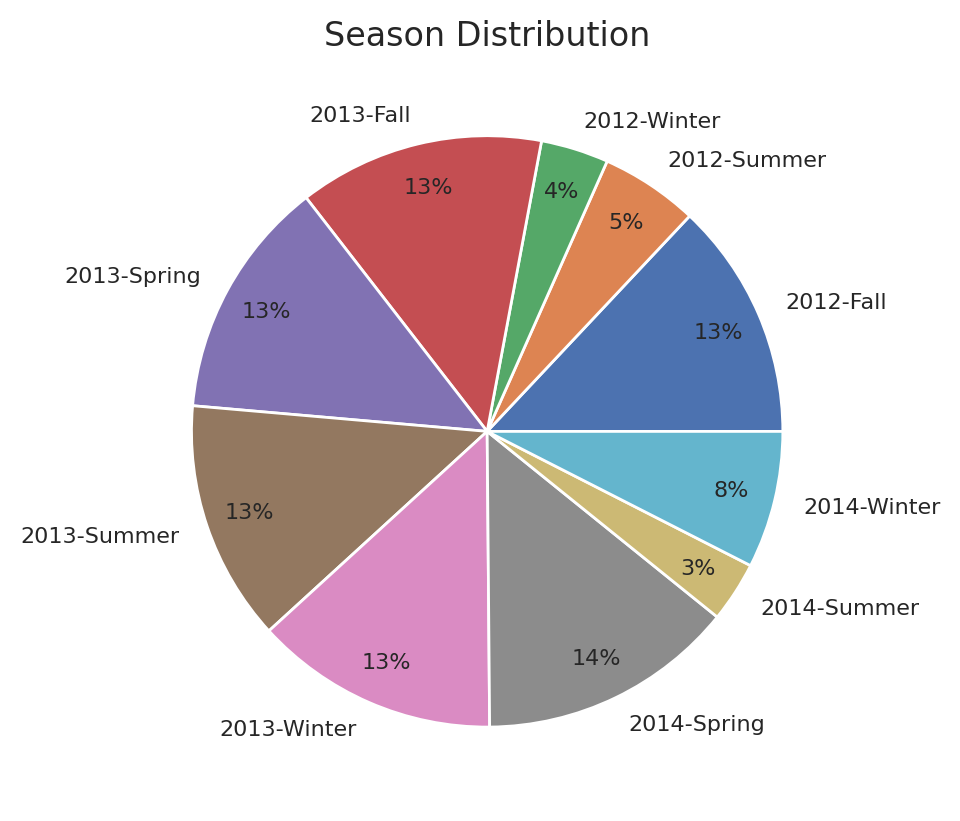

In [ ]:
import pandas as pd
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df['Season_Year'] = df['Dt_Customer'].dt.year.astype(str) + "-" + df['Dt_Customer'].apply(get_season)
counts = df['Season_Year'].value_counts().sort_index()
proportions = df['Season_Year'].value_counts(normalize=True).sort_index()
season_summary = pd.DataFrame({
    'Count': counts,
    'Proportion': proportions
})

print(season_summary)
plt.pie(season_summary['Proportion'], labels=season_summary.index, autopct='%1.0f%%', textprops={'fontsize': 8}, pctdistance=0.85)
plt.title('Season Distribution')
plt.show()


📊 AcceptedCmp1:
               Count  Proportion
AcceptedCmp1                   
No             2096    0.935714
Yes             144    0.064286

📊 AcceptedCmp2:
               Count  Proportion
AcceptedCmp2                   
No             2210    0.986607
Yes              30    0.013393

📊 AcceptedCmp3:
               Count  Proportion
AcceptedCmp3                   
No             2077    0.927232
Yes             163    0.072768

📊 AcceptedCmp4:
               Count  Proportion
AcceptedCmp4                   
No             2073    0.925446
Yes             167    0.074554

📊 AcceptedCmp5:
               Count  Proportion
AcceptedCmp5                   
No             2077    0.927232
Yes             163    0.072768

📊 Response:
           Count  Proportion
Response                   
No         1906    0.850893
Yes         334    0.149107


/tmp/ipython-input-3935012650.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_df, x="Campaign", y="Proportion_Yes", palette="Blues_d")


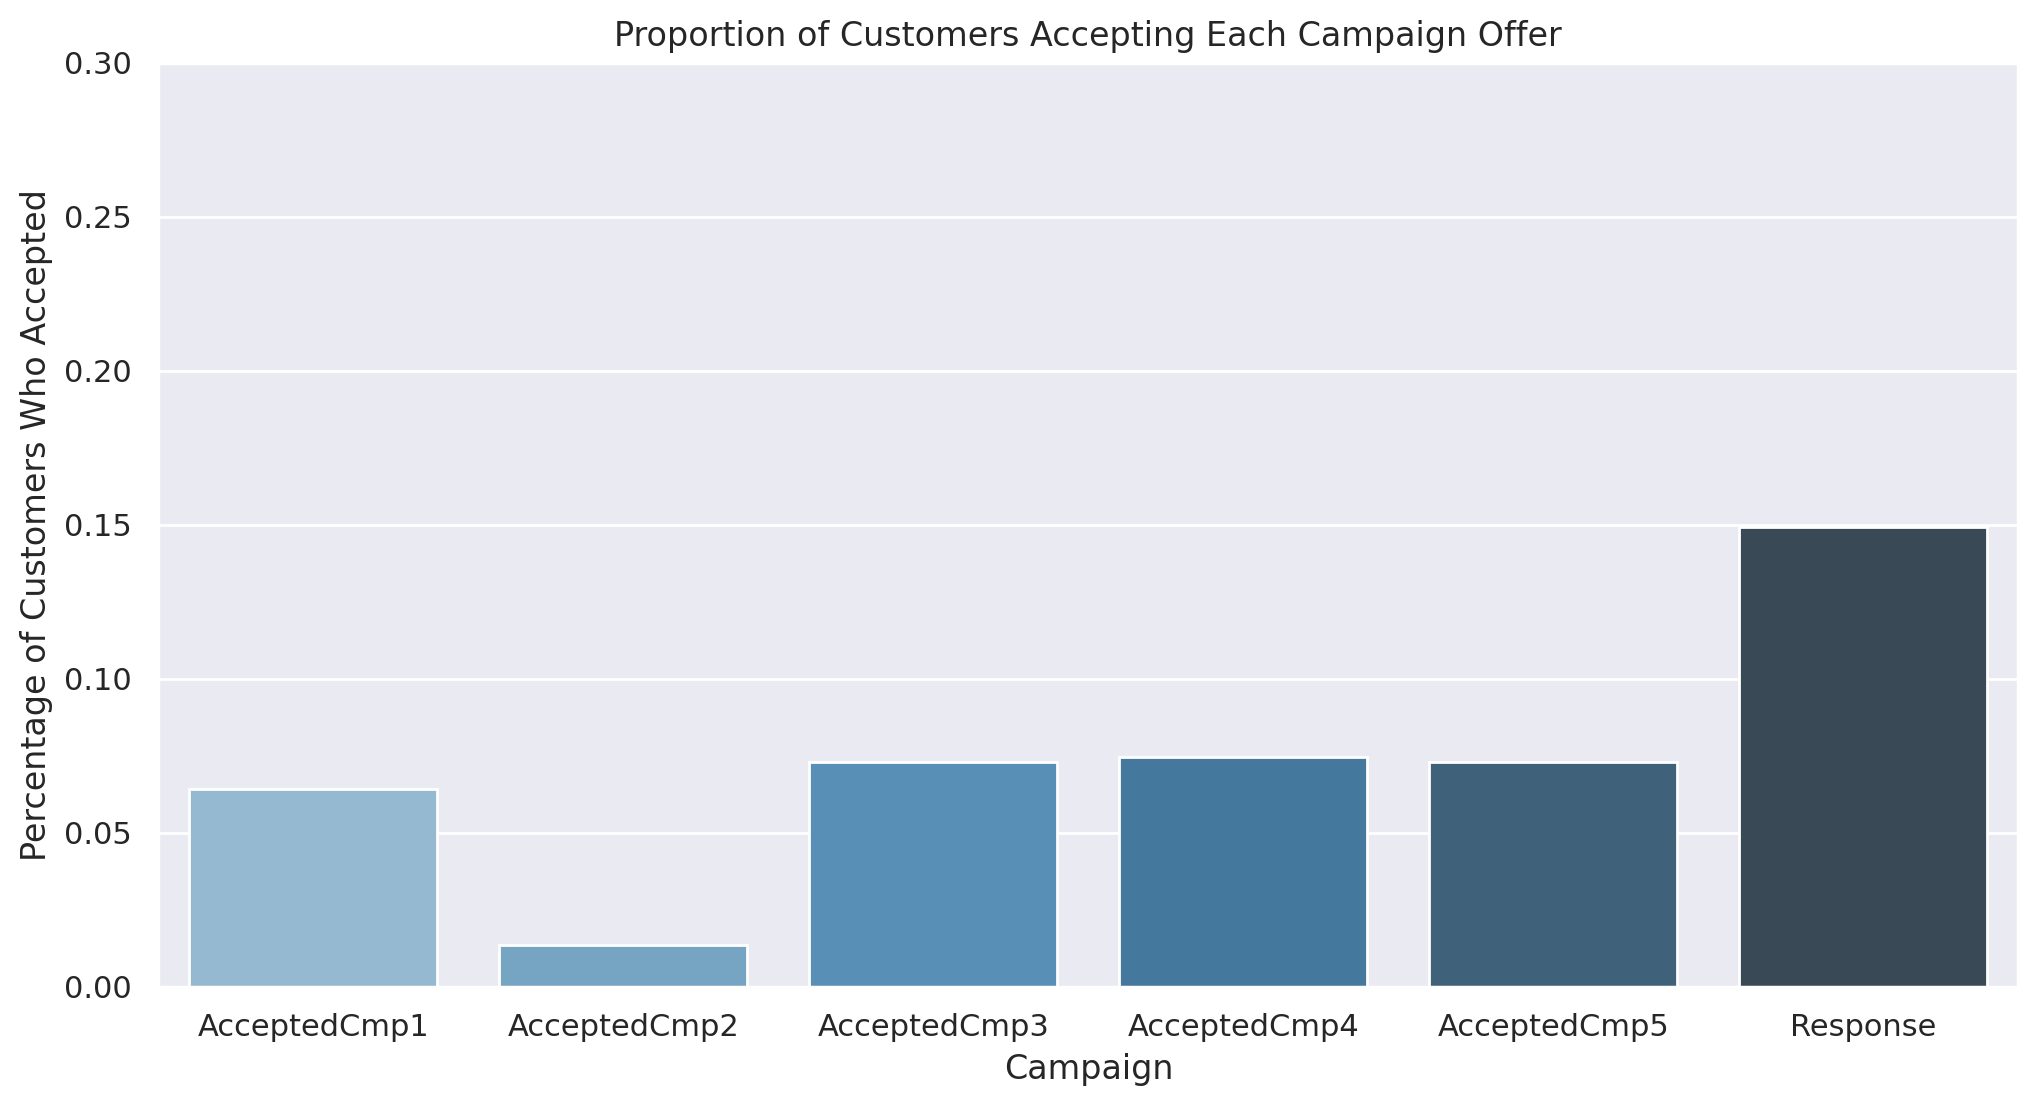

In [ ]:
campaigns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
for c in campaigns:
    df[c] = df[c].replace({0: "No", 1: "Yes"})
summary_tables = {}

for c in campaigns:
    counts = df[c].value_counts()
    proportions = df[c].value_counts(normalize=True)
    summary = pd.DataFrame({"Count": counts, "Proportion": proportions})
    summary_tables[c] = summary
    print(f"\n📊 {c}:\n", summary)
import matplotlib.pyplot as plt
import seaborn as sns

yes_props = {c: df[c].value_counts(normalize=True).get("Yes", 0) for c in campaigns}
prop_df = pd.DataFrame(list(yes_props.items()), columns=["Campaign", "Proportion_Yes"])
plt.figure(figsize=(12, 6))
sns.barplot(data=prop_df, x="Campaign", y="Proportion_Yes", palette="Blues_d")

plt.title("Proportion of Customers Accepting Each Campaign Offer")
plt.ylabel("Percentage of Customers Who Accepted")
plt.ylim(0, 0.3)
plt.show()
